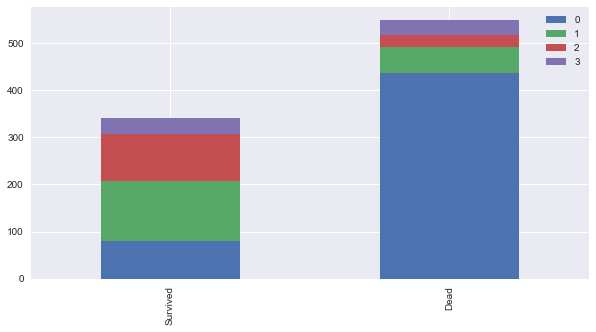

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

training_data = pd.read_csv('./train.csv')
testing_data = pd.read_csv('./test.csv')
combined_data = [training_data, testing_data]

for dataset in combined_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Rev": 3, "Dr": 3, "Col": 3, "Major":3, "Mlle": 3, "Countess":3, "Sir":3, "Mme":3, 
                 "Ms": 3, "Jonkheer":3, "Capt":3, "Don":3, "Lady":3, "Dona": 3
                }

for dataset in combined_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
training_data['Title'].value_counts()

def bar_chart(feature):
    survived = training_data[training_data['Survived']==1][feature].value_counts()
    dead = training_data[training_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('Title')



In [563]:
testing_data.drop('Name', axis=1, inplace = True)
training_data.drop('Name', axis=1, inplace = True)
training_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


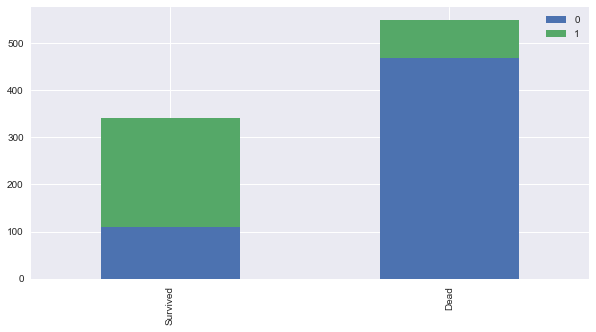

In [564]:
sex_mapping = { "male": 0, "female": 1}
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

bar_chart('Sex')

In [565]:
training_data["Age"].fillna(training_data.groupby("Title")["Age"].transform("median"), inplace=True) 
testing_data["Age"].fillna(testing_data.groupby("Title")["Age"].transform("median"), inplace=True) 

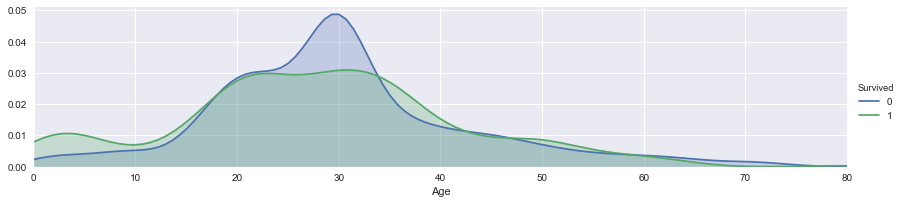

In [566]:
facet = sns.FacetGrid(training_data, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, training_data['Age'].max()))
facet.add_legend()
plt.show()

In [567]:
for dataset in combined_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


In [568]:
testing_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


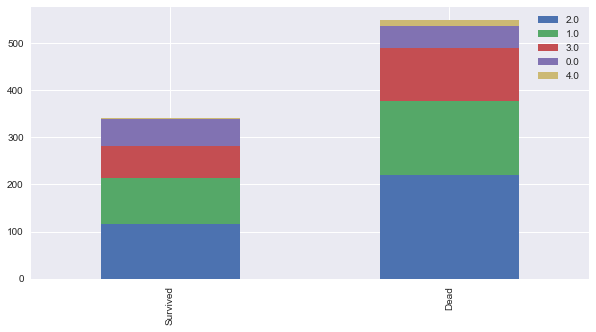

In [569]:
bar_chart('Age')

In [570]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    

In [571]:
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


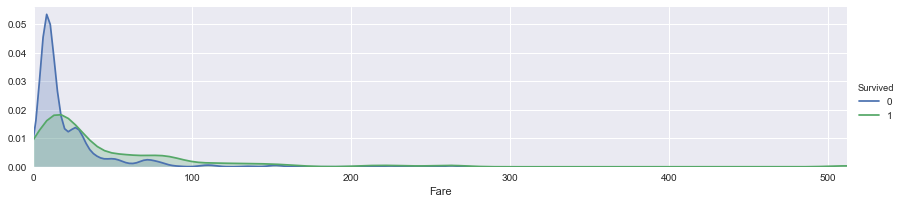

In [572]:
training_data["Fare"].fillna(training_data.groupby("Pclass")["Fare"].transform("median"), inplace=True) 
testing_data["Fare"].fillna(testing_data.groupby("Pclass")["Fare"].transform("median"), inplace=True) 

facet = sns.FacetGrid(training_data, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, training_data['Fare'].max()))
facet.add_legend()
plt.show()

In [573]:
for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [574]:
for dataset in combined_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

cabin_mapping = { "A":0, "B": 0.4, "C": 0.8, "D":1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in combined_data: 
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [575]:
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [576]:
training_data["Cabin"].fillna(training_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
testing_data["Cabin"].fillna(testing_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [577]:
training_data["FamilySize"] = training_data["SibSp"] + training_data["Parch"] + 1
testing_data["FamilySize"] = testing_data["SibSp"] + testing_data["Parch"] + 1
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in combined_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
    

In [578]:
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [579]:
features_drop = ['Ticket', 'SibSp', 'Parch']
training_data = training_data.drop(features_drop, axis=1)
testing_data = testing_data.drop(features_drop, axis=1)
training_data = training_data.drop(['PassengerId'], axis=1)

train_data = training_data.drop('Survived', axis=1)
target = training_data['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [580]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [581]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [582]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [583]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

clf = SVC()
clf.fit(train_data, target)

testing_up_data = testing_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(testing_up_data)

submission = pd.DataFrame({
        "PassengerId": testing_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)


